# PROBLEM STATEMENT

### DATASET : - https://raw.githubusercontent.com/chandanc5525/Life_Expectancy_PredictionModel/main/CleanedData.csv 

### QUESTIONARIES:- 
1. Does various predicting factors which has been chosen initially really affect Life
expectancy? What are the predicting variables actually affecting life expectancy?
2. Should a country having a lower life expectancy value(<65) increase its healthcare
expenditure in order to improve its average lifespan?
3. How do Infant and Adult mortality rates affect life expectancy?
4. Does Life Expectancy has a positive or negative correlation with eating habits,
lifestyle, exercise, smoking, drinking alcohol etc?
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have a positive or negative relationship with drinking
alcohol?
7. Do densely populated countries tend to have lower life expectancy?
8. What is the impact of Immunization coverage on Life Expectancy?

# MACHINE LEARNING LIFE CYCLE

1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training & Validation
7. Choose best model

# FEATURE INFORMATION 
1) Country
2) Year
3) Status – Developed or Developing status
4) Life expectancy – Life Expectancy in age
5) Adult Mortality – Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
6) infant deaths – Number of Infant Deaths per 1000 population
7) Alcohol – Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
8) percentage expenditure – Expenditure on health as a percentage of Gross Domestic Product per capita(%)
9) Hepatitis B – Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
10) Measles – Measles – number of reported cases per 1000 population
11) BMI – Average Body Mass Index of entire population
12) under-five deaths – Number of under-five deaths per 1000 population
13) Polio – Polio (Pol3) immunization coverage among 1-year-olds (%)
14) Total expenditure – General government expenditure on health as a percentage of total government expenditure (%)
15) Diphtheria – Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
16) HIV/AIDS – Deaths per 1 000 live births HIV/AIDS (0-4 years)
17) GDP – Gross Domestic Product per capita (in USD)
18) Population – Population of the country
19) thinness 1-19 years – Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
20) thinness 5-9 years – Prevalence of thinness among children for Age 5 to 9(%)
21) Income composition – Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22) Schooling – Number of years of Schooling(years)

## INSTALLING SUPPORTING PACKAGES

In [1]:
!pip install klib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
import math
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import FilterWarnings Library
import warnings
warnings.filterwarnings('ignore')
# Import EDA library
import klib

In [3]:
# Import Data using Pandas function

df = pd.read_csv('E:\\Life_Expectancy_PredictionModel\\notebook\\Data\\LifeExpectancyData.csv')
df.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2


In [4]:
# Checking the total Rows and Columns in the Dataset
df.shape

(2938, 22)

In [5]:
# Checking Columns
df.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B', 'Measles ', 'BMI',
       'under-five deaths', 'Polio', 'Total_Expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income_Cresources', 'Schooling',
       'Life_expectancy'],
      dtype='object')

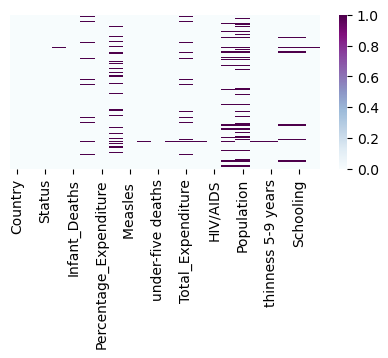

In [6]:
# Checking Missing Data Information
plt.figure(figsize = (5,2))
sns.heatmap(df.isnull(),cmap='BuPu',yticklabels=False);

## OBSERVATIONS 1

1. The Above Dataset Contains 2938 Rows and 22 Columns.
2. Out of 22 Columns, The LifeExpectancy Column acts as Target Column.
3. There are Total 133 Countries including Developed and Developing, and Few Feature Columns such as Percentage_Expenditure and Measles,Total Expenditure, Population and Schooling.
4. In Order to Evaluate Life Expectancy there are two possible ways:
      
      [a]. Simply drop all the rows  having null values in it, Since this dataset will be for 133 different countries w.r.t Years.
      
      [b]. We can go for Imputing Method so that Null values can be taken care.

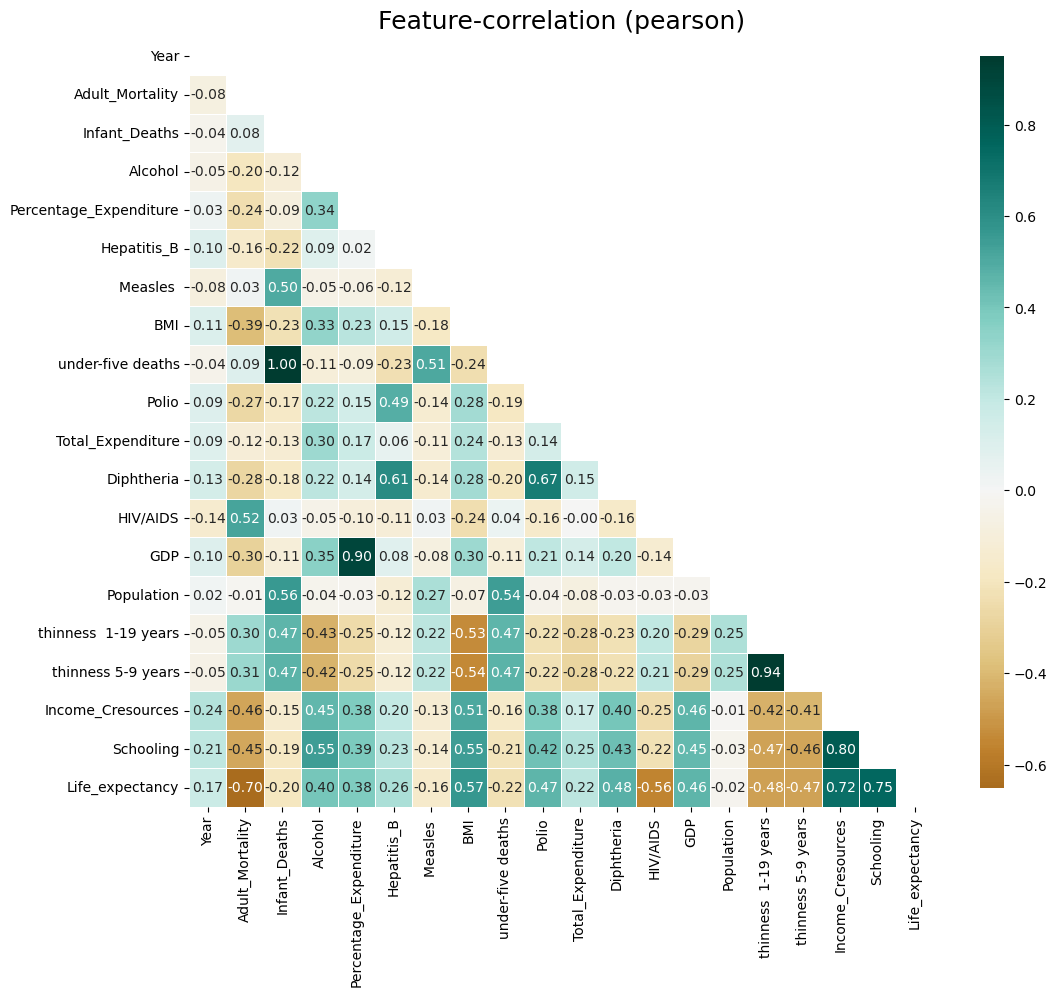

In [7]:
# Correlation Plot without Dropping Null Values
klib.corr_plot(df,annot=True);

In [8]:
# Dropping All Null Values in the Dataset
ndf = df.dropna()
ndf.shape

(1649, 22)

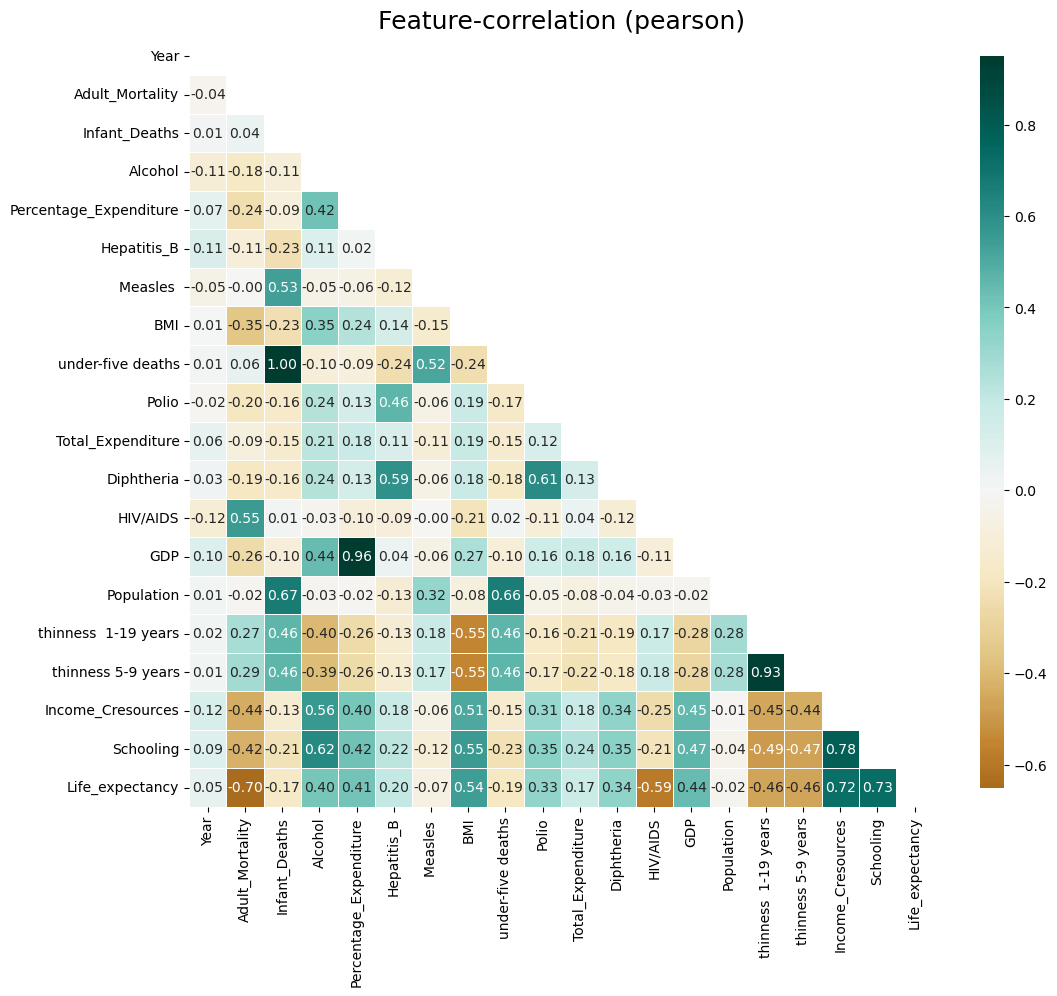

In [9]:
# Correlation Plot After Dropping Null Values
klib.corr_plot(ndf,annot=True);

## OBSERVATION 2

1. Life Expectancy is found to be Positively Correlated with Following Feature Columns such as -
   
   [a]. Schooling with 73%
    
    [b]. Income Composition Resources with 72%
    
    [c]. GDP with 44%
    
    [d]. BMI with 54%
    
    [e]. Percentage Expenditure and Alcohol with 40%
    
    [f]. Immunization we consider i.e.Hepetitis_B, Polio and Diphtheria having Positive Correlation with Life Expectancy
    
    



    
2. Life Expectancy is found to be Negatively Correlated with Following Feature Columns such as -

    [a]. Adult Mortality with 70%
    
    [b]. HIV/AIDS with 59%
    
    [c]. Thiness 1-19 Years and Thiness 5-9 Years with with 46%

### [Q].Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

In [10]:
ndf[ndf['Life_expectancy']<65]['Status'].value_counts()

Developing    439
Name: Status, dtype: int64

In [11]:
ndf[ndf['Life_expectancy']>65]['Status'].value_counts()

Developing    957
Developed     242
Name: Status, dtype: int64

In [12]:
ndf[ndf['Life_expectancy']==65]['Status'].value_counts()

Developing    11
Name: Status, dtype: int64

In [13]:
a = ndf[ndf['Life_expectancy']<65]['Country']
a.unique()

array(['Afghanistan', 'Angola', 'Benin', 'Bhutan', 'Botswana',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Djibouti',
       'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Iraq', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi',
       'Mali', 'Mauritania', 'Mongolia', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan',
       'Papua New Guinea', 'Russian Federation', 'Rwanda',
       'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'South Africa',
       'Swaziland', 'Tajikistan', 'Togo', 'Turkmenistan', 'Uganda',
       'Zambia', 'Zimbabwe'], dtype=object)

In [14]:
b = ndf[ndf['Life_expectancy']<65].mean()
b

Year                      2.007959e+03
Adult_Mortality           2.932005e+02
Infant_Deaths             5.905923e+01
Alcohol                   2.703007e+00
Percentage_Expenditure    9.658601e+01
Hepatitis_B               6.997950e+01
Measles                   2.824875e+03
BMI                       2.255626e+01
under-five deaths         8.657631e+01
Polio                     7.140547e+01
Total_Expenditure         5.730752e+00
Diphtheria                7.250797e+01
HIV/AIDS                  6.770387e+00
GDP                       1.017342e+03
Population                1.696464e+07
thinness  1-19 years      7.635763e+00
thinness 5-9 years        7.661048e+00
Income_Cresources         4.416446e-01
Schooling                 9.286788e+00
Life_expectancy           5.739408e+01
dtype: float64

## OBSERVATION 3

1. Developing Countries having Lower Life Expectancy i.e. Less than 65.
2. Income Composition Resources for such countries found to be very poor and also if we compare Total Expenditure for such countries are very less than Percentage Expanditure, Meaning Goverment has to focus more Expenditure in order to improve life expectancy.
3. BMI value is also found to be in Normal range i.e Between 18.5 to 24.5.

### [Q]. How do Infant and Adult mortality rates affect life expectancy?

In [15]:
# Dataset for Developed Countries
developed_country_data = ndf[ndf['Status']=='Developed']
developed_country_data

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
113,Australia,2014,Developed,6.0,1,9.71,10769.363050,91.0,340,66.1,...,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4,82.7
114,Australia,2013,Developed,61.0,1,9.87,11734.853810,91.0,158,65.5,...,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3,82.5
115,Australia,2012,Developed,61.0,1,10.03,11714.998580,91.0,199,65.0,...,9.36,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1,82.3
116,Australia,2011,Developed,63.0,1,10.30,10986.265270,92.0,190,64.4,...,9.20,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8,82.0
117,Australia,2010,Developed,64.0,1,10.52,8875.786493,92.0,70,63.9,...,9.20,92.0,0.1,51874.84800,223175.0,0.7,0.6,0.927,19.5,81.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Spain,2000,Developed,86.0,2,11.12,1934.398154,77.0,152,57.6,...,7.21,95.0,0.1,14676.76900,4567864.0,0.6,0.5,0.820,15.7,79.1
2506,Sweden,2014,Developed,54.0,0,7.30,1142.212403,67.0,26,59.0,...,11.93,98.0,0.1,5918.19898,969611.0,1.5,1.3,0.906,15.8,82.3
2507,Sweden,2013,Developed,57.0,0,7.30,1212.666327,67.0,51,58.5,...,11.97,98.0,0.1,6283.24522,96379.0,1.4,1.3,0.904,15.8,81.9
2508,Sweden,2012,Developed,57.0,0,7.40,10947.023270,53.0,30,58.1,...,11.80,98.0,0.1,57134.77700,9519374.0,1.4,1.3,0.903,15.8,81.7


In [16]:
developed_country_data.mean()

Year                      2.007504e+03
Adult_Mortality           8.419008e+01
Infant_Deaths             8.719008e-01
Alcohol                   1.043620e+01
Percentage_Expenditure    2.656822e+03
Hepatitis_B               8.788017e+01
Measles                   4.749339e+02
BMI                       5.233678e+01
under-five deaths         1.086777e+00
Polio                     9.449174e+01
Total_Expenditure         7.023099e+00
Diphtheria                9.464463e+01
HIV/AIDS                  1.000000e-01
GDP                       1.897693e+04
Population                8.744688e+06
thinness  1-19 years      1.435950e+00
thinness 5-9 years        1.460744e+00
Income_Cresources         8.361612e-01
Schooling                 1.557355e+01
Life_expectancy           7.869174e+01
dtype: float64

In [17]:
# Dataset for Developed Countries
developing_country_data = ndf[ndf['Status']=='Developing']
developing_country_data

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [18]:
developing_country_data.mean()

Year                      2.007898e+03
Adult_Mortality           1.826674e+02
Infant_Deaths             3.800213e+01
Alcohol                   3.517896e+00
Percentage_Expenditure    3.622293e+02
Hepatitis_B               7.772779e+01
Measles                   2.525414e+03
BMI                       3.568486e+01
under-five deaths         5.163895e+01
Polio                     8.168515e+01
Total_Expenditure         5.772374e+00
Diphtheria                8.235110e+01
HIV/AIDS                  2.307889e+00
GDP                       3.259395e+03
Population                1.566995e+07
thinness  1-19 years      5.437953e+00
thinness 5-9 years        5.500640e+00
Income_Cresources         5.963589e-01
Schooling                 1.152587e+01
Life_expectancy           6.768735e+01
dtype: float64

## OBSERVATION 4

1. Infant and Adult Mortality Rate found to be very poor for Developing Countries as Compared with Developed Countries. 

2. There are Plenty of reason for the same few reasons are listed below - High GDP, Lesser Total Expenditure, Comparatively Less immunization for Developing Countries 

3. Intresting Fact is Alcohol Consumption found to be very high for Developing Countries

### [Q]. Does Life Expectancy has a positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc?

## OBSERVATION 5

1. From Above Data, We Found that the Value of BMI is Good for Developed Countries in comparison with Developing Country.

2. As Already Mentioned, The Alcohol Consumption is very high for Developing Countries.

3. Life Expectancy is found to be Positively Correlated with Following Feature Columns such as -

[a]. Income Composition Resources with 72%

[b]. BMI with 54%

[c]. Percentage Expenditure and Alcohol with 40%


### [Q]. What is the impact of schooling on the lifespan of humans?

## OBSERVATION 6

Schooling – Number of years of Schooling (years)

1. Schooling has positive correlation w.r.t Life Expectancy i.e. 73%

2. For Developed Countries - Schooling found to be very higher compared with Developing Countries.

3. Schooling also further related with Life style and Health Conciousness and Eating Habbits. This might be the reason for higher life expectancy found for developed countries than developing countries

### [Q].Does Life Expectancy have a positive or negative relationship with drinking alcohol?

## OBSERVATION 7

Life Expectancy found to be Positively correlated with Alcohol i.e. 40%

### [Q].Do densely populated countries tend to have lower life expectancy?

## OBSERVATION 8

In [19]:
ndf['Population'].max()

1293859294.0

In [20]:
ndf['Population'].min()

34.0

In [21]:
ndf['Population'].mean()

14653625.889484538

In [22]:
# Dense Populated Country
ndf[ndf['Population']==1293859294.0]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
1187,India,2014,Developing,184.0,957,3.07,86.521539,79.0,79563,18.1,...,4.69,85.0,0.2,1573.11889,1.293859e+09,26.8,27.4,0.607,11.6,68.0


In [23]:
# Low populated Country
ndf[ndf['Population']==34]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
1614,Maldives,2003,Developing,112.0,0,1.75,491.497891,98.0,75,16.7,...,5.9,98.0,0.1,3432.247841,34.0,14.6,14.7,0.601,11.8,72.7


In [24]:
# More populated Countries i.e Population higher than Mean
ndf[ndf['Population']>14653625.889484538]

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,...,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_Cresources,Schooling,Life_expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
8,Afghanistan,2007,Developing,295.0,82,0.02,10.910156,63.0,1141,15.2,...,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4,57.5
11,Afghanistan,2004,Developing,293.0,87,0.02,15.296066,67.0,466,13.8,...,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8,57.0
13,Afghanistan,2002,Developing,3.0,88,0.01,16.887351,64.0,2486,13.0,...,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2,56.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,Ukraine,2014,Developing,23.0,4,8.06,5.663849,22.0,0,6.7,...,7.10,23.0,0.2,314.658296,45271947.0,2.3,2.4,0.746,15.2,78.0
2744,Ukraine,2001,Developing,253.0,6,4.31,8.897421,7.0,16970,55.1,...,5.66,99.0,0.8,78.738243,48683865.0,2.9,3.0,0.673,13.2,67.7
2745,Ukraine,2000,Developing,257.0,6,4.49,7.883791,4.0,817,54.8,...,5.59,99.0,0.7,635.789635,49175848.0,3.0,3.1,0.669,13.3,67.5
2909,Zambia,2012,Developing,349.0,29,2.59,196.915250,78.0,896,21.7,...,4.91,78.0,5.6,1734.936120,14699937.0,6.5,6.3,0.554,12.3,59.2


In [25]:
# More populated Countries i.e Population higher than Mean - Taking Mean to Cross Check Average Life Expectancy
ndf[ndf['Population']>14653625.889484538].mean()

Year                      2.008253e+03
Adult_Mortality           1.710616e+02
Infant_Deaths             1.004281e+02
Alcohol                   4.300068e+00
Percentage_Expenditure    7.251462e+02
Hepatitis_B               7.453425e+01
Measles                   4.773493e+03
BMI                       3.494110e+01
under-five deaths         1.354521e+02
Polio                     8.085274e+01
Total_Expenditure         5.434007e+00
Diphtheria                8.235616e+01
HIV/AIDS                  1.623288e+00
GDP                       5.477714e+03
Population                7.219815e+07
thinness  1-19 years      6.258904e+00
thinness 5-9 years        6.306164e+00
Income_Cresources         6.375959e-01
Schooling                 1.187021e+01
Life_expectancy           6.903801e+01
dtype: float64

### OBSERVATION 9

From Above Analysis, The Dense Populated Countries have Average Life Expectancy of 69 Years.

### [Q]. What is the impact of Immunization coverage on Life Expectancy?

### OBSERVATION 10

1. From Correlation Matrix we Found that, Higher the Immunization Higher will be the Life Expectancy.


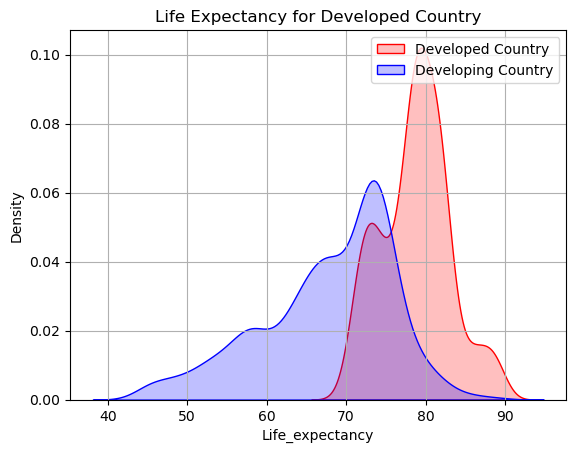

In [26]:
# Life Expectancy for Developed vs Developing Country
sns.kdeplot(x = developed_country_data.Life_expectancy,fill=True,color='red');
sns.kdeplot(x = developing_country_data.Life_expectancy,fill=True,color='blue');
plt.legend(['Developed Country','Developing Country'])
plt.title('Life Expectancy for Developed Country')
plt.grid()

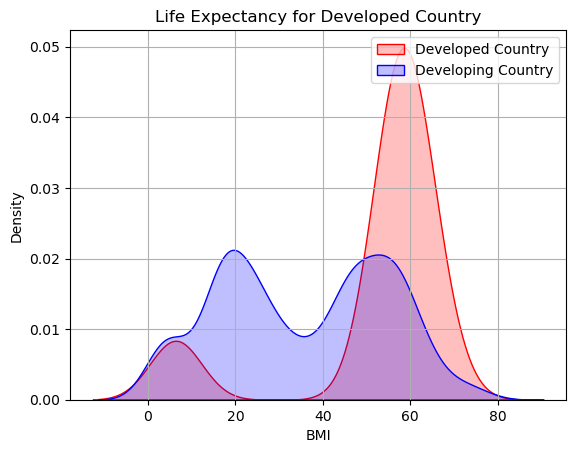

In [27]:
# BMI for Developed vs Developing Country
sns.kdeplot(x = developed_country_data.BMI,fill=True,color='red');
sns.kdeplot(x = developing_country_data.BMI,fill=True,color='blue');
plt.legend(['Developed Country','Developing Country'])
plt.title('Life Expectancy for Developed Country')
plt.grid()

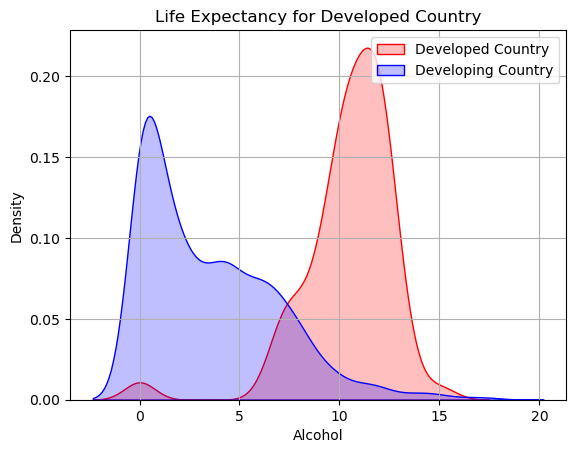

In [28]:
# Alcohol Consumption for Developed vs Developing Country
sns.kdeplot(x = developed_country_data.Alcohol,fill=True,color='red');
sns.kdeplot(x = developing_country_data.Alcohol,fill=True,color='blue');
plt.legend(['Developed Country','Developing Country'])
plt.title('Life Expectancy for Developed Country')
plt.grid()

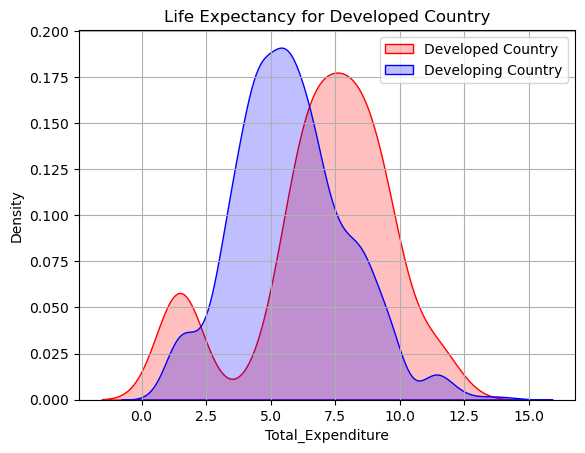

In [29]:
# Total Expenditure Consumption for Developed vs Developing Country
sns.kdeplot(x = developed_country_data.Total_Expenditure,fill=True,color='red');
sns.kdeplot(x = developing_country_data.Total_Expenditure,fill=True,color='blue');
plt.legend(['Developed Country','Developing Country'])
plt.title('Life Expectancy for Developed Country')
plt.grid()

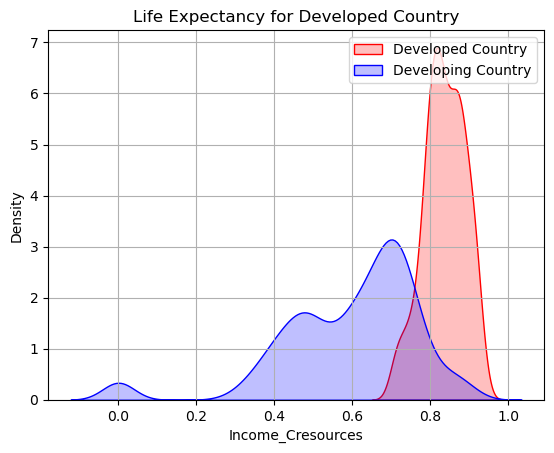

In [30]:
# Income Composition Resources for Developed vs Developing Country
sns.kdeplot(x = developed_country_data.Income_Cresources,fill=True,color='red');
sns.kdeplot(x = developing_country_data.Income_Cresources,fill=True,color='blue');
plt.legend(['Developed Country','Developing Country'])
plt.title('Life Expectancy for Developed Country')
plt.grid()